## **SALES PREDICTION USING PYTHON**
### Task 5 - Oasis Infobyte Internship
- SANTHA LAKSHMI S

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [18]:
# Load the dataset
file_path = "/content/Advertising.csv"
df = pd.read_csv(file_path, encoding='latin-1')

In [19]:
# Explore the dataset
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Check for missing values and data types

   S.no     TV  Radio  Newspaper  Sales
0     1  230.1   37.8       69.2   22.1
1     2   44.5   39.3       45.1   10.4
2     3   17.2   45.9       69.3    9.3
3     4  151.5   41.3       58.5   18.5
4     5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S.no       200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [20]:
# Extract features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Add polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the model to the training data with polynomial features
model.fit(X_train_poly, y_train)

# Make predictions on the test set with polynomial features
y_pred = model.predict(X_test_poly)

# Evaluate the model with polynomial features
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
# Print evaluation metrics
print(f'Mean Squared Error (with polynomial features): {mse}')
print(f'R-squared (with polynomial features): {r2}')

Mean Squared Error (with polynomial features): 0.41291022853790765
R-squared (with polynomial features): 0.9869181490609602


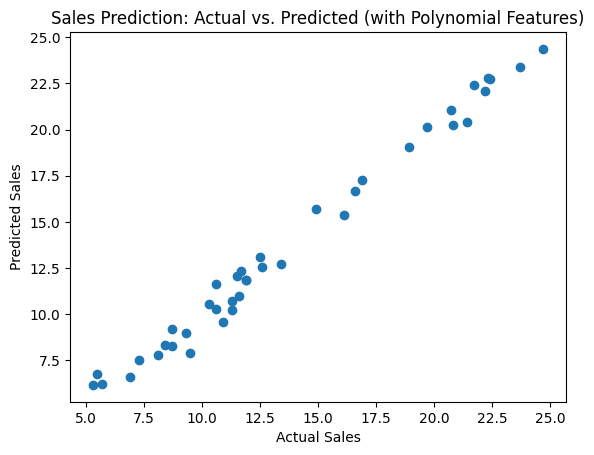

In [23]:
# Visualize the predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Sales Prediction: Actual vs. Predicted (with Polynomial Features)')
plt.show()

In [24]:
# Compare with a baseline model (simple linear regression)
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_baseline_pred = baseline_model.predict(X_test)

mse_baseline = mean_squared_error(y_test, y_baseline_pred)
r2_baseline = r2_score(y_test, y_baseline_pred)

In [25]:
# Print baseline model evaluation metrics
print(f'\nBaseline Model:')
print(f'Mean Squared Error (simple linear regression): {mse_baseline}')
print(f'R-squared (simple linear regression): {r2_baseline}')


Baseline Model:
Mean Squared Error (simple linear regression): 3.1740973539761033
R-squared (simple linear regression): 0.899438024100912


In [26]:
# Compare coefficients of the models
print('\nModel Coefficients:')
print('With Polynomial Features:', model.coef_)
print('Simple Linear Regression:', baseline_model.coef_)


Model Coefficients:
With Polynomial Features: [ 0.00000000e+00  5.32356160e-02  1.70980451e-02  1.05807447e-02
 -1.12286779e-04  1.11121741e-03 -7.37989541e-05  1.32842962e-04
  1.24892479e-04  2.79665560e-05]
Simple Linear Regression: [0.04472952 0.18919505 0.00276111]
